In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

%matplotlib inline

In [37]:
BASE_FOLDER = '../climate-change-earth-surface-temperature-data'

In [38]:
FILENAME = 'GlobalTemperatures.csv'
df = pd.read_csv(BASE_FOLDER + '/' + FILENAME)

In [39]:
df = df[['dt', 'LandAverageTemperature']]
df = df.set_index('dt')

In [40]:
df.head()

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573


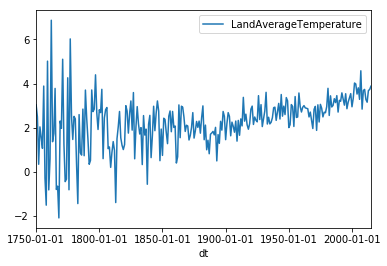

In [41]:
df[::12].plot()
plt.show()

[  1.49821068e-07  -2.31588849e-05   3.29192045e-03   1.68250605e+00]


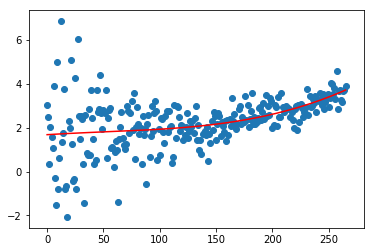

In [47]:
t = df[::12]
x = range(0, len(t.index.values))
y = t.LandAverageTemperature

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=3)
print(fit)
ax.plot(x, fit[0] * x*x*x + fit[1] * x*x + fit[2] * x + fit[3], color='red')
ax.scatter(x, y)

In [64]:
FILENAME = 'GlobalLandTemperaturesByCity.csv'
df = pd.read_csv(BASE_FOLDER + '/' + FILENAME)

In [65]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [106]:
df_loc = df[df.dt == '1790-01-01'].reset_index()[['Latitude', 'Longitude']]

In [107]:
df_loc.Latitude = df_loc.Latitude.map(lambda x: '-' + x[:-1] if x.endswith('S') else x[:-1]).astype(float)
df_loc.Longitude = df_loc.Longitude.map(lambda x: '-' + x[:-1] if x.endswith('W') else x[:-1]).astype(float)

In [108]:
coords = df_loc.values.tolist()

In [109]:
map = folium.Map()

for p in coords: 
    folium.Marker(p).add_to(map)

In [110]:
map